# Prueba de Kolmogorov-Smirnov

En esta prueba ordenamos la muestra $X_n$ de menor a mayor y comparamos la frecuencia observada contra la frecuencia esperada; es decir, comparamos contra la distribución acumulativa $F(x)$.

---

### Hipótesis

$$H_0: X_n \sim U(0,1)$$

$$H_a: X_n \not\sim U(0,1)$$

---

### Paso 1

Ordenar los números de la muestra en orden ascendente:

$$x_1 \leq x_2 \leq \dots \leq x_N$$

### Paso 2

Se calculan dos estadísticos a partir de cada observación ordenada $x_i$, donde $i$ es la posición:

\begin{align*}
  D^+ & = \max_{1 \leq i \leq N} \left| \frac{i}{N} - x_i \right| \\
  D^- & = \max_{1 \leq i \leq N} \left| x_i - \frac{i-1}{N} \right|
\end{align*}

El estadístico final es:

$$D = \max(D^+, D^-)$$

### Paso 3

Se compara $D$ con el valor crítico $d_{\alpha, N}$ obtenido de las tablas de Kolmogorov-Smirnov:

\begin{align*}
  \text{Si } D & < d_{\alpha, N} \Rightarrow \text{No se rechaza } H_0 \\
  \text{Si } D & \geq d_{\alpha, N} \Rightarrow \text{Se rechaza } H_0
\end{align*}

In [156]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## Datos — Tabla 3.1

In [157]:
ui = np.array([
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
])

## Ordenar la muestra

In [158]:
x_ord = np.sort(ui) # x_1 <= x_2 <= ... <= x_N
n = len(x_ord)
i_vec = np.arange(1, n + 1) # posiciones 1, 2, ..., N

print(f"Primeros 5 valores ordenados: {x_ord[:5]}") # nomas para probar
print(f"Últimos  5 valores ordenados: {x_ord[-5:]}") # nomas para probar

Primeros 5 valores ordenados: [0.00121 0.03185 0.03272 0.0501  0.0523 ]
Últimos  5 valores ordenados: [0.90829 0.91512 0.93655 0.94187 0.98611]


## Tabla con $D^-$ y $D^+$ por observación

Para cada $x_i$ ordenado se calculan:

$$D_i^+ = \left| \frac{i}{N} - x_i \right|, \qquad D_i^- = \left| x_i - \frac{i-1}{N} \right|$$

In [159]:
i_n = i_vec / n # i/N
i1_n = (i_vec - 1) / n # (i-1)/N
D_mas = np.abs(i_n  - x_ord)
D_menos = np.abs(x_ord - i1_n)

tabla_ks = pd.DataFrame({
    "i"        : i_vec,
    "x_i"      : x_ord,
    "(i-1)/N"  : i1_n,
    "i/N"      : i_n,
    "D-"       : D_menos,
    "D+"       : D_mas
})

pd.set_option('display.max_rows', 10)
print(tabla_ks.to_string(index=False))

  i     x_i  (i-1)/N  i/N      D-      D+
  1 0.00121     0.00 0.01 0.00121 0.00879
  2 0.03185     0.01 0.02 0.02185 0.01185
  3 0.03272     0.02 0.03 0.01272 0.00272
  4 0.05010     0.03 0.04 0.02010 0.01010
  5 0.05230     0.04 0.05 0.01230 0.00230
  6 0.05475     0.05 0.06 0.00475 0.00525
  7 0.07281     0.06 0.07 0.01281 0.00281
  8 0.08128     0.07 0.08 0.01128 0.00128
  9 0.09133     0.08 0.09 0.01133 0.00133
 10 0.09264     0.09 0.10 0.00264 0.00736
 11 0.10699     0.10 0.11 0.00699 0.00301
 12 0.10850     0.11 0.12 0.00150 0.01150
 13 0.11537     0.12 0.13 0.00463 0.01463
 14 0.12079     0.13 0.14 0.00921 0.01921
 15 0.14151     0.14 0.15 0.00151 0.00849
 16 0.15506     0.15 0.16 0.00506 0.00494
 17 0.17028     0.16 0.17 0.01028 0.00028
 18 0.18284     0.17 0.18 0.01284 0.00284
 19 0.19147     0.18 0.19 0.01147 0.00147
 20 0.19904     0.19 0.20 0.00904 0.00096
 21 0.19962     0.20 0.21 0.00038 0.01038
 22 0.20852     0.21 0.22 0.00148 0.01148
 23 0.21631     0.22 0.23 0.00369 

## Calcular $D^+$, $D^-$ y $D$

In [160]:
D_mas_max = D_mas.max()
D_menos_max = D_menos.max()
D = max(D_mas_max, D_menos_max)

print(f"D+ = {D_mas_max:.6f}  (posicion i = {D_mas.argmax() + 1})")
print(f"D- = {D_menos_max:.6f}  (posicion i = {D_menos.argmax() + 1})")
print(f"D  = max(D+, D-) = {D:.6f}")

D+ = 0.056420  (posicion i = 89)
D- = 0.046420  (posicion i = 89)
D  = max(D+, D-) = 0.056420


## Valor crítico $d_{\alpha, N}$

El valor crítico de Kolmogorov-Smirnov se obtiene con `scipy.stats.ksone`. Para $N = 100$ y $\alpha = 0.05$:

$$d_{0.05,\, 100} = \text{ksone.ppf}\left(1 - \frac{\alpha}{2},\, N\right)$$

In [161]:
d_critico = stats.ksone.ppf(1 - alpha / 2, n) # valor critico bilateral
p_ks = stats.kstest(x_ord, 'uniform').pvalue

print(f"d_critico (alpha={alpha}, N={n}) = {d_critico:.6f}")
print(f"p-valor = {p_ks:.6f}")

d_critico (alpha=0.05, N=100) = 0.134028
p-valor = 0.889866


## Decisión

$$\text{Si } D < d_{\alpha, N} \Rightarrow \text{No se rechaza } H_0$$

In [162]:
print("Resultados")
print(f"D+ = {D_mas_max:.6f}")
print(f"D- = {D_menos_max:.6f}")
print(f"D = {D:.6f}")
print(f"d_critico = {d_critico:.6f}")
print(f"p-valor = {p_ks:.6f}")

print("\nDecision")
if D < d_critico:
    print(f"D = {D:.4f} < d_critico = {d_critico:.4f}")
    print("No se rechaza H0: los numeros siguen una distribucion U(0,1)")
else:
    print(f"D = {D:.4f} >= d_critico = {d_critico:.4f}")
    print("Se rechaza H0: los numeros NO siguen una distribucion U(0,1)")

Resultados
D+ = 0.056420
D- = 0.046420
D = 0.056420
d_critico = 0.134028
p-valor = 0.889866

Decision
D = 0.0564 < d_critico = 0.1340
No se rechaza H0: los numeros siguen una distribucion U(0,1)


## Gráfica — Prueba de Kolmogorov-Smirnov

Se compara la función de distribución empírica $F_o(x)$ (escalera) contra la distribución teórica $F(x) = x$ de una $U(0,1)$. La distancia máxima entre ambas es $D$.

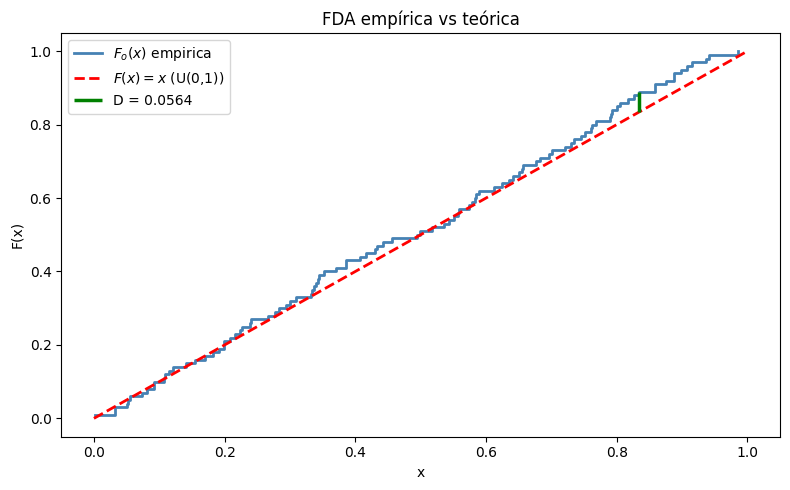

In [163]:
plt.figure(figsize=(8, 5))

# --- FDA empírica vs teórica ---
x_plot = np.linspace(0, 1, 400)

# FDA empírica (escalera)
plt.step(x_ord, i_vec / n, where='post',
         color='steelblue', linewidth=2,
         label='$F_o(x)$ empirica')

# FDA teórica U(0,1)
plt.plot(x_plot, x_plot,
         color='red', linewidth=2,
         linestyle='--',
         label='$F(x) = x$ (U(0,1))')

# Marcar D
idx_D = D_mas.argmax() if D_mas_max >= D_menos_max else D_menos.argmax()

plt.vlines(x_ord[idx_D],
           x_ord[idx_D],
           i_vec[idx_D] / n,
           color='green', linewidth=2.5,
           label=f'D = {D:.4f}')

plt.title('FDA empírica vs teórica')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

plt.tight_layout()
plt.show()